<a href="https://colab.research.google.com/github/ulkster/ELVTR---AI-Finance/blob/main/Ulkucu_Assignment_5_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Full Assignment 5 - Credit Risk**

* Since trying to run the full code exceeds the system RAM available on free Colab, I'm keeping the hierarchy separate and not enclosing everything within the assignment title as I normally would to allow for one-click running of the full code

In [ ]:
# Writing a Bold function for use elsewhere instead of having to type '\033[1m' every time (which is hardly intuitive)
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

**CLEAR Garbage:**

* Rerun the code below during development to free resources.

In [ ]:
# Run this to clean some garbage periodically since the csv is so large & takes up multiple GB in RAM

import gc
gc.collect()  # Force garbage collection

0

## **1. Data Loading**

##### Load Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

##### Load Data

* I loaded by mounting my Google Drive after manually uploading the CSV.  Tester should comment out this code since you haven't have access to my drive.

* I also included code to use the upload() function commented out since uploading a 1.6 GB file every time takes a long time (and I feel like it's not using full bandwidth --> slower than my manually uploading it to my drive during development).

###### Mounting Google Drive

* How I did it first since this is the method I used in my previous course

In [ ]:
# let colab access my google drive
from google.colab import drive
#drive.mount('/content/drive')    # Commented out since Colab seems to do this automatically

In [ ]:
# For loading from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv', low_memory=False)



---


**WAIT a few seconds (l@@k the System RAM)** for the usage to drop a bit before continuing.  It should retract from about 10.8GB (out of 12.7 max) back down to around 7.3.

* If you don't wait and try to run more code cells, system will guarantee crash.


---



###### Upload via Colab Files (commented out)

* Another method without having to connect to my personal Google drive

In [ ]:
# Commented out now since it's such a large file to upload (1.6GB) every time the session starts...
# ... and I already have it in my Drive (which is mounted)

"""
from google.colab import files
upload = files.upload()
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False, dtype=dtypes)
"""

"\nfrom google.colab import files\nupload = files.upload()\ndata = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False, dtype=dtypes)\n"

### **1b.  Deciding on Chosen Features**

#### A. Working on Choosing Columns for Workable DataFrame

##### Brief L@@K Data

* Looking at the data to start to make decisions on which features we'll keep to analyze

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


###### Examining Datatypes

In [ ]:
data.dtypes

,0
id,object
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
...,...
settlement_status,object
settlement_date,object
settlement_amount,float64
settlement_percentage,float64


* Since there are 151 columns, the display cuts off by default.
* But I *want* to see all the columns so that I can pick the ones I want to use for this assignment (i.e. three numerical & three categorical, in addition to the target).
* So I'll eliminate the maximum **rows** in order to display all the "columns" in the *"data.dtypes"* command (since the columns are listed as rows for viewability).

In [ ]:
# Display all columns
pd.set_option('display.max_rows', None)

In [ ]:
data.dtypes

,0
id,object
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object


#### ***Checking some Uniques, Nulls & Stats for Features to Choose***

* I am looking at unique values in categoricals and statistics in numericals to make sure the features I choose have useful entries (ex: I had originally chosen *'hardship_length'*, but after running statistics, it seems that [nearly] every entry = 0.
  * So instead, I chose *'hardship_payoff_balance_amount'* as a better numerical feature to analyze.

In [ ]:
# prompt: check data nulls

data.isnull().sum()

,0
id,0
member_id,2260701
loan_amnt,33
funded_amnt,33
funded_amnt_inv,33
term,33
int_rate,33
installment,33
grade,33
sub_grade,33


###### Checking Unique Values for Chosen Categoricals

* *'Grade'* - Seems useful as the grade of a loan
* *'Hardship_flag'* - The credit risk probably has something to do with if a customer was flagged for having a financial hardship.
* *Addr_state'* - There might be some correlation between credit risk and what state somebody lives in (because of income, law, politics, etc.).

In [ ]:
# Show Uniques for Categorical Variables ('Grade' of the loan)
print(data['grade'].unique())

['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]


In [ ]:
# Show Uniques for Hardship Status
print(data['hardship_flag'].unique())

['N' 'Y' nan]


In [ ]:
# Show Uniques for the State Where a Person Lives
print(data['addr_state'].unique())

['PA' 'SD' 'IL' 'NJ' 'GA' 'MN' 'SC' 'RI' 'TX' 'NC' 'CA' 'VA' 'AZ' 'NY'
 'IN' 'MD' 'KS' 'NM' 'AL' 'WA' 'MO' 'OH' 'LA' 'FL' 'CO' 'MI' 'TN' 'DC'
 'MA' 'WI' 'HI' 'VT' 'DE' 'NH' 'NE' 'CT' 'OR' 'AR' 'MT' 'NV' 'WV' 'WY'
 'OK' 'KY' 'MS' 'ME' 'UT' 'ND' 'AK' nan 'ID' 'IA']


###### Statistics Stats for Chosen Numerical Variables

* *'Annual_inc'* - A person's income probably has some correlation with their credit risk.
* *'DTI'* - How much debt a person has compared to their income also seems to be relevant (ex: hopefully, their debt isn't so high that their income won't be able to pay it off).
* *'Funded_amnt_inv'* - The amount of a loan that has money committed by investors seems relevant to assessing credit risk (i.e. intuitively, I feel that the more money that's been invested should lead to a lower credit risk).

In [ ]:
# prompt: statistics for annual_inc, dti & hardship_length

# Display summary statistics for 'annual_inc', 'dti', and 'hardship_length'
data[['annual_inc', 'dti', 'funded_amnt_inv']].describe()

,annual_inc,dti,funded_amnt_inv
count,2.260664e+06,2.258957e+06,2.260668e+06
mean,7.799243e+04,1.882420e+01,1.502344e+04
std,1.126962e+05,1.418333e+01,9.192332e+03
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,4.600000e+04,1.189000e+01,8.000000e+03
50%,6.500000e+04,1.784000e+01,1.280000e+04
75%,9.300000e+04,2.449000e+01,2.000000e+04
max,1.100000e+08,9.990000e+02,4.000000e+04


##### **Make a NEW DataFrame with only SIX columns**

* **Numerical**:
  * *'annual_inc'*
  * *'dti'*
  * *'hardship_length*'

* **Categorical**
  * *'grade'*
  * *'hardship_status'*
  * *'addr_state'*


In [ ]:
# prompt: make copy of data with only six specific columns

selected_columns = ['grade', 'hardship_flag', 'addr_state', 'annual_inc', 'dti', 'funded_amnt_inv']
data = data[selected_columns].copy()

In [ ]:
# Now 'data' contains only the six specified columns
data.sample(5)

,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
513521,D,N,CA,96000.0,19.76,27000.0
59206,A,N,SC,65000.0,10.73,30000.0
965126,B,N,RI,92000.0,21.86,25000.0
760220,C,N,FL,95000.0,39.10,21000.0
1644269,C,N,CA,57000.0,7.73,5975.0


--> *This confirms that the new 'data' DataFrame only has the six chosen columns* <--

###### Nulls Check

In [ ]:
# prompt: check data nulls

data.isnull().sum()

,0
grade,33
hardship_flag,33
addr_state,33
annual_inc,37
dti,1744
funded_amnt_inv,33


--> *After trying several times to choose seemingly relevant variables, I wanted to choose features that:*

* Had lower amount of null's (*'dti'* has the most at 1,744 out of over two million entries).

* The **categoricals** have various amounts of uniques:
  * *'grade'* - seven uniques
  * *'hardship_flag'* - binary (two uniques)
  * *'addr_state'* - fifty uniques

* The **numericals** have statistics with some spread (i.e. not most of the data centered around 0 then just a few outliers with large values).

#### B. Continuinig with Six-Column *Data*

* **Categorical:** *'grade'*, *'hardship_flag'*, *'addr_state'*

* **Numerical:** *'annual_inc'*, *'dti'*, *'funded_amnt_inv'*

##### Final Preview of Chosen Columns

In [ ]:
data.dtypes

,0
grade,object
hardship_flag,object
addr_state,object
annual_inc,float64
dti,float64
funded_amnt_inv,float64


In [ ]:
data.sample(5)

,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
400857,A,N,IN,55000.0,24.24,18000.0
1799114,B,N,NJ,226000.0,21.34,18000.0
22877,B,N,MD,58000.0,18.55,15000.0
601416,B,N,NY,120000.0,16.12,26400.0
332768,A,N,NY,50000.0,12.60,8000.0


In [ ]:
# prompt: show nulls for each column with bold_text on just the title

# Display null counts with a bold title
print(bold_text("Null Values per Column:"))
print(data.isnull().sum())

Null Values per Column:
grade                33
hardship_flag        33
addr_state           33
annual_inc           37
dti                1744
funded_amnt_inv      33
dtype: int64


In [ ]:
# prompt: list uniques for data categorical using the bold function

# Show Uniques for Categorical Variables
print(bold_text("Unique values for 'grade':"))
print(data['grade'].unique())

print(bold_text("\nUnique values for 'hardship_flag':"))
print(data['hardship_flag'].unique())

print(bold_text("\nUnique values for 'addr_state':"))
print(data['addr_state'].unique())

Unique values for 'grade':
['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]

Unique values for 'hardship_flag':
['N' 'Y' nan]

Unique values for 'addr_state':
['PA' 'SD' 'IL' 'NJ' 'GA' 'MN' 'SC' 'RI' 'TX' 'NC' 'CA' 'VA' 'AZ' 'NY'
 'IN' 'MD' 'KS' 'NM' 'AL' 'WA' 'MO' 'OH' 'LA' 'FL' 'CO' 'MI' 'TN' 'DC'
 'MA' 'WI' 'HI' 'VT' 'DE' 'NH' 'NE' 'CT' 'OR' 'AR' 'MT' 'NV' 'WV' 'WY'
 'OK' 'KY' 'MS' 'ME' 'UT' 'ND' 'AK' nan 'ID' 'IA']


## **2. Data Exploration**

#### A) Numerical Features

* (i)   Summary Statistics
* (ii)  Distributions (KDE Histograms & Boxplots)
* (iii) Correlation Heatmap

##### (i) Summary Statistics

In [ ]:
data.describe()

,annual_inc,dti,funded_amnt_inv
count,2.260664e+06,2.258957e+06,2.260668e+06
mean,7.799243e+04,1.882420e+01,1.502344e+04
std,1.126962e+05,1.418333e+01,9.192332e+03
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,4.600000e+04,1.189000e+01,8.000000e+03
50%,6.500000e+04,1.784000e+01,1.280000e+04
75%,9.300000e+04,2.449000e+01,2.000000e+04
max,1.100000e+08,9.990000e+02,4.000000e+04


##### **(ii) Distributions**

* Dot plot for *'annual_inc'* & *'dti'*
* Boxplot for *'dti'*
* KDE Histogram for *'funded_amnt_inv'*

###### *Annual Income*

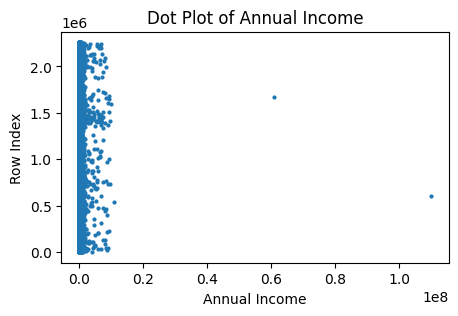

In [ ]:
# prompt: dot plot for income on the x-axis

plt.figure(figsize=(5, 3))    # (columns, rows)
plt.plot(
    data['annual_inc'],       # the input column along the x-axis
    data.index,               # the row index is along the y-axis so that you see each data point separately
    'o',                      # style for the markers on the plot
    markersize=2              # a size of 2 is pretty small
  )
plt.xlabel('Annual Income')
plt.ylabel('Row Index')       # since there are over two million entries,...
                              # ... the row index range is as a power of 10 (1e6 = 10^6 = six digits)
plt.title('Dot Plot of Annual Income')
plt.show()

**Observations:**

* After several rounds of trying to choose my features, I decided on *'annual_inc'* but was confused as to why there was only one block in the histogram no matter how I tried changing the scale.

* So then I figured I'd try a dotplot instead so I could actually see data points.
  * Now I can see that there are two severe outliers (around 0.6 & 1.1) that were the culprits since they are so far above the rest of the data.  We'll deal with those later (likely remove since they're so far from the vast majority of the data).

###### *Debt-to-Income*

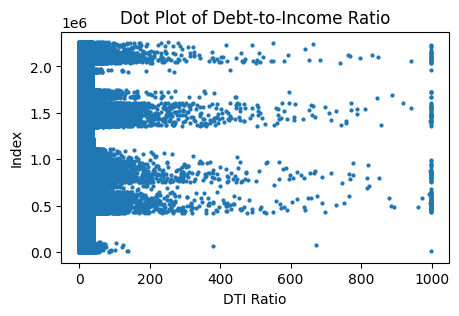

In [ ]:
# Similar Dot Plot for DTI since a histogram also was not helpful

plt.figure(figsize=(5, 3))
plt.plot(data['dti'], data.index, 'o', markersize=2)  # Create the dot plot
plt.xlabel('DTI Ratio')
plt.ylabel('Index')
plt.title('Dot Plot of Debt-to-Income Ratio')
plt.show()

**Observations:**

* The data here is also mostly concentrated in the lower end like the *Annual Income*, but there is more spread here, so let's see how a boxplot displays.

* In this particular case, there seems to be a significant amount of data that goes up towards the 400 DTI level that might be worthy of keeping in the data and not counting as "outliers" if they meet that criteria.

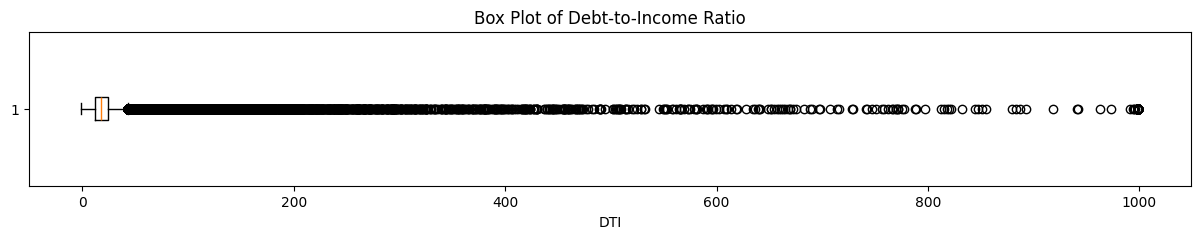

In [ ]:
# prompt: box plot for dti

plt.figure(figsize=(15, 2))
plt.boxplot(data['dti'].dropna(), vert=False)  # Use dropna() to handle potential NaN values
plt.xlabel('DTI')
plt.title('Box Plot of Debt-to-Income Ratio')
plt.show()

**Observations:**

* The box is very small/condensed around 0-50 range, with an excess of outliers all way through to 1000 filling up nearly all the space in between.

* Everything past 50 is classified as an outlier, but the concentration of "outliers" from around 50-400 is quite thick (as we noted in the dot plot) and might be worthwhile to include in our data moving forward.

In [ ]:
# prompt: outliers count

# Assuming 'data' is your DataFrame and 'dti' is the column you want to analyze.
# Calculate the IQR
Q1 = data['dti'].quantile(0.25)
Q3 = data['dti'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = len(data[(data['dti'] < lower_bound) | (data['dti'] > upper_bound)])
print("Number of outliers in ", bold_text('dti:'), outliers_count)

Number of outliers in  dti: 21590


**Observations:**

* The raw data shows quite a large amount of outliers (over 21k).  Unlike *Annual Income* that only had two major outliers (visible from the dot plot) that can likely just be removed without affecting any further analysis, the plethora of outliers here suggest that simply **removing** is likely **not** the best idea.  Instead, some **scaling** seems **reasonable** if we were to move forward with building ML models.
  * We may also try a larger threshold for what constitutes as "outliers" (ex: 3xIQR instead of 1.5xIQR).

* Also, since *'dti'* does have about 1.7k missing values (null), imputing those might help the distribution.

###### *Distribution of Funded Amount Invested*

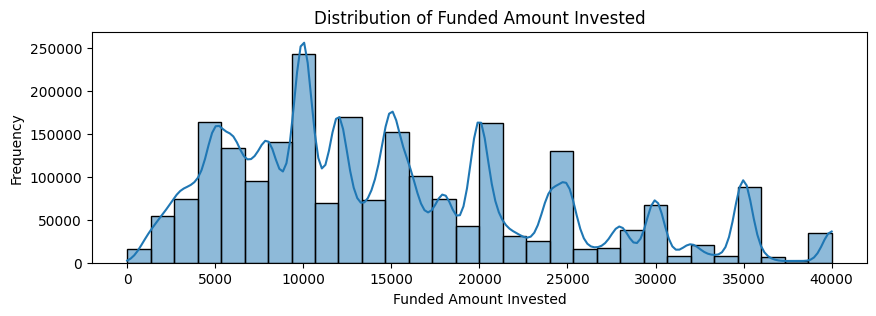

In [ ]:
# prompt: histogram with kde for funded_amnt_inv

import seaborn as sns

plt.figure(figsize=(10, 3))
sns.histplot(data['funded_amnt_inv'], kde=True, bins=30)      # I set the amount of bins to 30 to avoid the default having far more bins that were far skinnier
plt.title('Distribution of Funded Amount Invested')
plt.xlabel('Funded Amount Invested')
plt.ylabel('Frequency')
plt.show()

**Observations:**

* A bit of a right skew to the data
* The **most frequent** funded investment amount is about **\$10,000**
* Interesting that there's a visible cycle of low/high once you get past $10k & the graph trends downward overall from that highpoint to **\$40,000**.
* Just this one graph seems to take longer than I would expect (15s).  Perhaps this is due to the KDE being involved with such large values

##### **(iii) Correlation Heatmap**

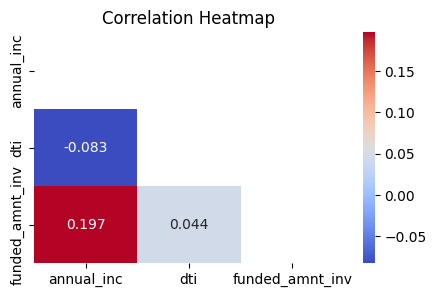

In [ ]:
# Calculate the correlation matrix
corr = data.corr(numeric_only=True)
plt.figure(figsize=(5, 3))
plt.title('Correlation Heatmap')

### Show just LOWER Triangle since the other corner has duplicate values ###
lower = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

# Create the actual heatmap with the lower triangle
sns.heatmap(lower, cmap='coolwarm', annot=True, fmt=".3f")

plt.show()

* No significant correlations, but this is probably expected with such few features out of a much larger set of possibile columns to choose from.

#### B) Categoricals

* (i) Straight Count for *'Hardship_flag'*
* (ii) Loan Grades (Bar Graph)
* (iii) State Distribution (Bar Graph)

##### (i) Straight Count for *'Hardship_flag'*

* Visualizations were misleading --> needed to report as numbers.

In [ ]:
# prompt: counts for each unique hardship_flag bold

# Count occurrences of each unique value in 'hardship_flag'
hardship_counts = data['hardship_flag'].value_counts()

# Print the counts with bold formatting
print(bold_text("Counts for each unique hardship_flag:"))
for hardship_flag, count in hardship_counts.items():
    print(f"{bold_text(hardship_flag)}: {count}")

Counts for each unique hardship_flag:
N: 2259836
Y: 832


**Observations:**

* I had to just show a straight count since it's overwhelmingly 'N' for customers being flagged as having a hardship and any visualization makes it seem like it's 100% 'N' (instead of the small fraction that is actually 'Y').

* This likely means it will not provide much value in further model building/analysis.

##### (ii) Loan Grade Distribution (Bar Graph)

* I included code (commented out now) to show possible color maps to try for the bar graph

In [ ]:
# Get a list of all registered colormaps
#all_colormaps = plt.colormaps()

# Print the list
#print(all_colormaps)

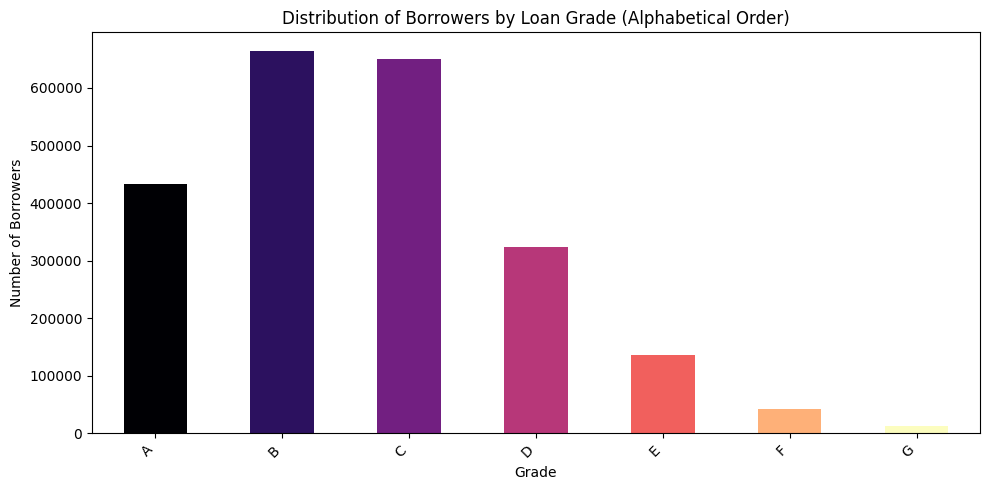

In [ ]:
# prompt: distribution for LOAN GRADE in ALPHABETICAL order

grade_counts = data['grade'].value_counts().sort_index()   # Alphabetize the loan grades

# Plotting the distribution
plt.figure(figsize=(10, 5))
grade_counts.plot(kind='bar',     # Bar graph (i.e. separated histogram) for the loan grades
                  color=plt.cm.magma(np.linspace(0, 1, len(grade_counts)))   # using "magma" color palette
                  )

plt.title('Distribution of Borrowers by Loan Grade (Alphabetical Order)')
plt.xlabel('Grade')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

* Grades *B* & *C* have the majority of loans, ~65k each.
  * Reminds me of how academic grades seem to often be distributed.

* Unsurprisingly, the right skew of this chart (in alphabetical order, which is also the quality of the loan) suggests that there are fewer people with the riskier/lower quality loans.

* I tried a pie chart just out of curiosity, and I guess the experts are correct in it not having much value because of a lack of readability and ease of comparing distributions visually :-/.

##### (iii) State Distribution (Bar Graph)

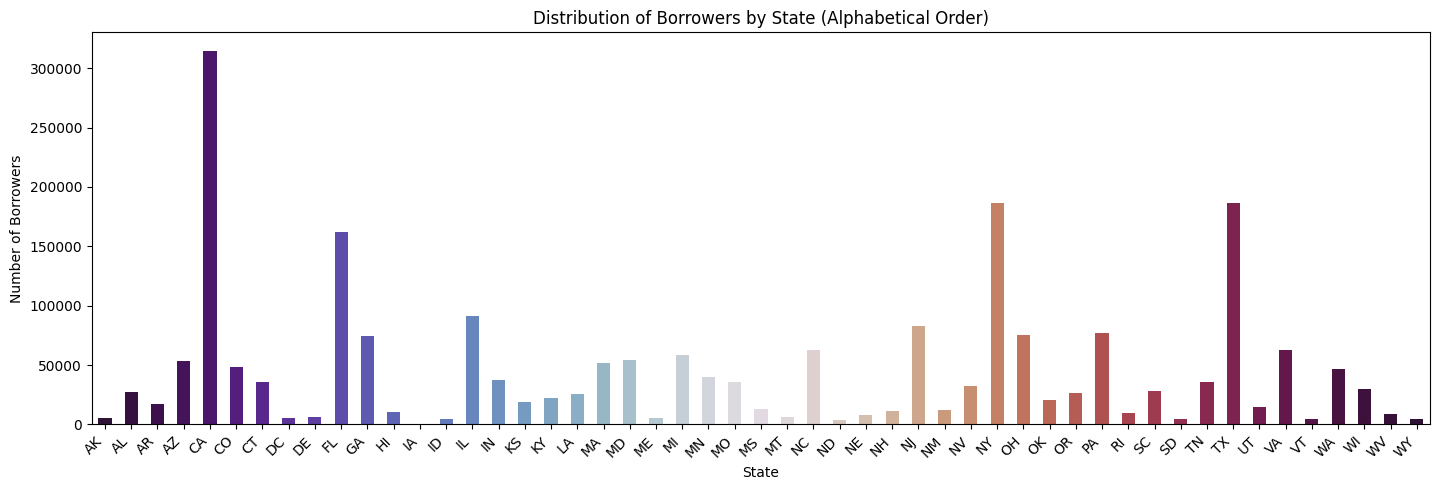

In [ ]:
# prompt: distribution for STATE in ALPHABETICAL order

state_counts = data['addr_state'].value_counts().sort_index()   # Alphabetize the states

# Plotting the distribution
plt.figure(figsize=(14.5, 5))
state_counts.plot(kind='bar',     # Bar graph (i.e. separated histogram) for the states
                  color=plt.cm.twilight_shifted(np.linspace(0, 1, len(state_counts)))   # using "twilight_shifted" color palette
                  )

plt.title('Distribution of Borrowers by State (Alphabetical Order)')
plt.xlabel('State')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

* As would be expected, *California* has a significant majority in the amount of borrowers (it is also the most populous state).

* *Florida*, *New York* & *Texas* also have large popoulations, so it makes sense that they all have a high number of borrowers.
  * It may be a bit surprising that *Texas* borrowers are quite similar to *Florida* & *New York*, but it has a significantly higher overall population (30 mill vs 22 mill & 17 mill, respectively).  So if the amount of borrowers was strictly proportional to population, you might expect *Texas* to have more borrowers than this.*
    * One reason might be that since taxes & property are cheaper in *Texas*, maybe fewer people need to borrow such loans.

## **3. Handling Missing Values**

**Reminder for original statistics:**

In [ ]:
# prompt: data_orig describe for just the three columns in data

print(bold_text('ORIGINAL Data Statistics for Chosen Numericals BEFORE Imputation: \n'))
data[['annual_inc', 'dti', 'funded_amnt_inv']].describe()

ORIGINAL Data Statistics for Chosen Numericals BEFORE Imputation: 



,annual_inc,dti,funded_amnt_inv
count,2.260701e+06,2.260701e+06,2.260701e+06
mean,7.799243e+04,1.882420e+01,1.502344e+04
std,1.126953e+05,1.417786e+01,9.192265e+03
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,4.600000e+04,1.190000e+01,8.000000e+03
50%,6.500000e+04,1.785000e+01,1.280000e+04
75%,9.300000e+04,2.448000e+01,2.000000e+04
max,1.100000e+08,9.990000e+02,4.000000e+04


### Count Nulls & Impute

* Numericals receive *mean*
* Categoricals receive *mode*

In [ ]:
# prompt: nulls in data

# Display null counts with a bold title
print(bold_text("Null Values per Column:"))
print(data.isnull().sum())

# Fill missing numerical values with the mean
for col in ['annual_inc', 'dti', 'funded_amnt_inv']:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing categorical values with the mode
for col in ['grade', 'hardship_flag', 'addr_state']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify that there are no more null values
print(bold_text("\nNull Values after imputation:"))
print(data.isnull().sum())

Null Values per Column:
grade              0
hardship_flag      0
addr_state         0
annual_inc         0
dti                0
funded_amnt_inv    0
dtype: int64

Null Values after imputation:
grade              0
hardship_flag      0
addr_state         0
annual_inc         0
dti                0
funded_amnt_inv    0
dtype: int64


**Observations:**

* Of course, the nulls count should be all 0 after imputation.

* Interesting that just the prompt of "nulls in data" also generated automatic imputation to fill in:
  * *Mean* --> numerical (logical to fill in with the average)
  * *Mode* --> categorical (makes sense, and there are very few empties, so it won't skew any analysis)

### Compare to Original Data

* Check how the numerical statistics changed after imputation to make sure nothing changed drastically.

* The categorical modes won't change, obviously, since we're filling in empties with more of the mode.  No need to explicitly compare anything.

In [ ]:
print(bold_text('NEW Data Statistics for Chosen Numericals AFTER Imputation: \n'))
data.describe()

NEW Data Statistics for Chosen Numericals AFTER Imputation: 



,annual_inc,dti,funded_amnt_inv
count,2.260701e+06,2.260701e+06,2.260701e+06
mean,7.799243e+04,1.882420e+01,1.502344e+04
std,1.126953e+05,1.417786e+01,9.192265e+03
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,4.600000e+04,1.190000e+01,8.000000e+03
50%,6.500000e+04,1.785000e+01,1.280000e+04
75%,9.300000e+04,2.448000e+01,2.000000e+04
max,1.100000e+08,9.990000e+02,4.000000e+04


**Observations (post-imputation):**

* *Count* increased by the amount of nulls there were (obviously).

* *Mean*, *25%(Q1)*, *50%(median/Q2)*, *75%(Q3)* had no calculable change (so few nulls were filled).

* *Standard Deviation* had a **marginal decrease** in all three metrics (but miniscule in context).  But it does make sense that there's a decrease in *std* with more data inputted at the mean since there's less variance now (however slight).

* *Min* & *Max* had no change because they are unaffected by more instances of the *mean* being filled in.

## **4. Encoding Categorical Variables**

* *'Grade'* = **ordinal** since the order matters ('A' is better than 'B')
  * **IMPORTANT**: the order will be in "reverse" (i.e. 'A'>'B', but 1<2)

* *'Hardship_flag'* = **binary**
  *'Y' = 1 & 'N' = 0

* *'Addr_state'* = **one-hot** (dummies) since order doesn't matter

###### Only run this **BEFORE** encoding

In [ ]:
# Make copy of data BEFORE encoding

data_pre_encode = data.copy()

data_pre_encode.head()


,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
0,C,N,PA,0.005000,0.00691,0.0900
1,C,N,SD,0.005910,0.01706,0.6175
2,B,N,IL,0.005728,0.01178,0.5000
3,C,N,NJ,0.010001,0.01806,0.8750
4,F,N,PA,0.009495,0.02637,0.2600


###### **Separated ^above and below> code cells to NOT accidentally run both if not needed**

###### Run this **AFTER** encoding to restart the process if needed

* The original data file is huge & slow to reload, so this is for just backtracking one step if you want to try different encoding methods

In [ ]:
# Keep a line ready to reload the 'data' from our pre-encoding placeholder
'''
data = data_pre_encode.copy()

data.head()   # make sure it matches above
'''

'\ndata = data_pre_encode.copy()\n\ndata.head()   # make sure it matches above\n'

### Encoding Together

* When testing/developing, do **NOT** run code groups together (just run specific cells when needed)

#### *'Grade'* = **Ordinal**

* The loan grades are sequential, so the order matters

In [ ]:
# prompt: ordinal encoding for grade

# Create a mapping for ordinal encoding of grades
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Apply ordinal encoding to the 'grade' column
data['grade'] = data['grade'].map(grade_mapping)

In [ ]:
# SEPARATE a call statement since you don't want to re-encode (which will create nulls)
data.head()

,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
0,3,N,PA,55000.0,5.91,3600.0
1,3,N,SD,65000.0,16.06,24700.0
2,2,N,IL,63000.0,10.78,20000.0
3,3,N,NJ,110000.0,17.06,35000.0
4,6,N,PA,104433.0,25.37,10400.0


#### *'Hardship_flag'* = **Binary**

In [ ]:
# prompt: one hot binary encoding for hardship flag without dummies

# Assuming 'data' is your DataFrame and 'hardship_flag' is the column
data['hardship_flag'] = data['hardship_flag'].map({'Y': 1, 'N': 0})

In [ ]:
# Again, SEPARATE the data call so it's not re-encoded
data.sample(5)  # using a "sample" here instead of "head" to maybe see a 'hardship_flag' = 1

,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
813422,1,0,MI,25000.0,8.31,5000.0
1345866,3,0,CA,105000.0,26.10,35000.0
419267,4,0,VA,120000.0,30.26,19200.0
1197495,4,0,PA,260000.0,9.74,35000.0
1006587,5,0,NJ,125000.0,16.16,35000.0


#### *'Addr_state'* = **One-hot** (dummy variables)

* Order does **not** matter, so we'll just make dummies for each column (ex: "CA_Y", etc.)

In [ ]:
# prompt: one hot for state

# Create dummy variables for 'addr_state'
state_dummies = pd.get_dummies(data['addr_state'], prefix='addr_state', dtype=int)    # add "dtype=int" to make it 1/0 instead of True/False so it can be quantified if needed...
                                                                                      # ... but if that's not necessary, simply remove that parameter.

# Concatenate dummy variables with the original DataFrame
data = pd.concat([data, state_dummies], axis=1)

# Drop the original 'addr_state' column
data = data.drop('addr_state', axis=1)

In [ ]:
# Display a sample rows of the updated DataFrame
data.sample(5)

,grade,hardship_flag,annual_inc,dti,funded_amnt_inv,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
2151133,1,0,30000.0,12.00,10000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403392,2,0,60000.0,21.38,10000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1367218,1,0,65000.0,18.65,5500.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2061426,1,0,90000.0,10.84,4000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1459533,1,0,134000.0,28.56,19000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **5. Scaling Numerical Features**


In [ ]:
#del data_pre_encode # once you're done with it, release its memory

##### Removing the two visibly obvious outliers in *income*

In [ ]:
# prompt: show top 5 incomes

# Assuming 'data' is your DataFrame and 'annual_inc' is the income column.
top_5_incomes = data['annual_inc'].nlargest(5)
top_5_incomes

,annual_inc
601128,110000000.0
1673140,61000000.0
539807,10999200.0
1597151,9930475.0
1413812,9757200.0


In [ ]:
# prompt: drop two incomes > .2e8

# Identify incomes greater than 0.2e8
incomes_to_drop = data[data['annual_inc'] > 0.2e8].index  # pre-MinMaxScalar

# Drop the identified rows
data = data.drop(incomes_to_drop)

# Print some info so you can confirm the number of rows that were dropped
print(f"Number of rows dropped: {len(incomes_to_drop)}")
print(f"New DataFrame shape: {data.shape}")

# You can now proceed with the rest of your analysis with the modified DataFrame.

Number of rows dropped: 2
New DataFrame shape: (2260699, 6)


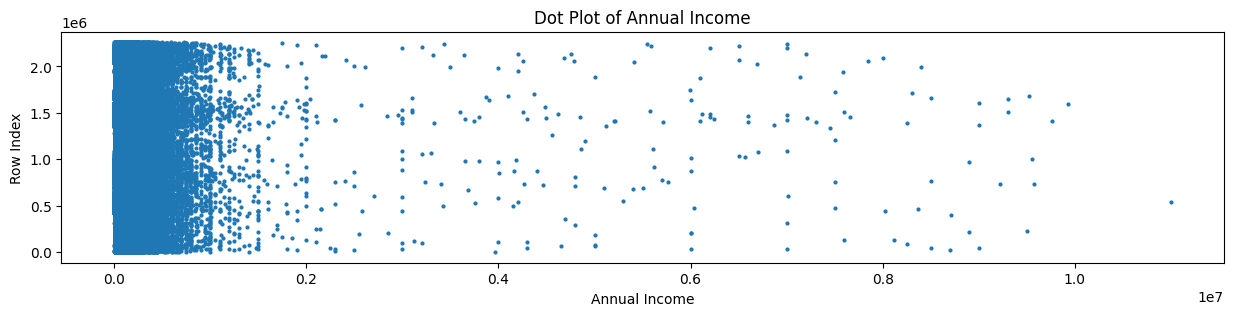

In [ ]:
# prompt: dot plot for income on the x-axis

plt.figure(figsize=(15, 3))    # (columns, rows)
plt.plot(
    data['annual_inc'],       # the input column along the x-axis
    data.index,               # the row index is along the y-axis so that you see each data point separately
    'o',                      # style for the markers on the plot
    markersize=2              # a size of 2 is pretty small
  )
plt.xlabel('Annual Income')
plt.ylabel('Row Index')       # since there are over two million entries,...
                              # ... the row index range is as a power of 10 (1e6 = 10^6 = six digits)
plt.title('Dot Plot of Annual Income')
plt.show()

##### Logging *Debt-to-income*

* The boxplot for *'dti'* showed many data points qualifying as outliers that filled a very large range past the upper whisker
* So we'll try a **log transformation** instead of MinMax (which doesn't change the shape of the distribution and would not help the outlier issue).

In [ ]:
# prompt: outliers count

# Assuming 'data' is your DataFrame and 'dti' is the column you want to analyze.
# Calculate the IQR
Q1 = data['dti'].quantile(0.25)
Q3 = data['dti'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Count outliers
outliers_count = len(data[(data['dti'] < lower_bound) | (data['dti'] > upper_bound)])
print("Number of outliers in ", bold_text('dti:'), outliers_count)

Number of outliers in  dti: 7525


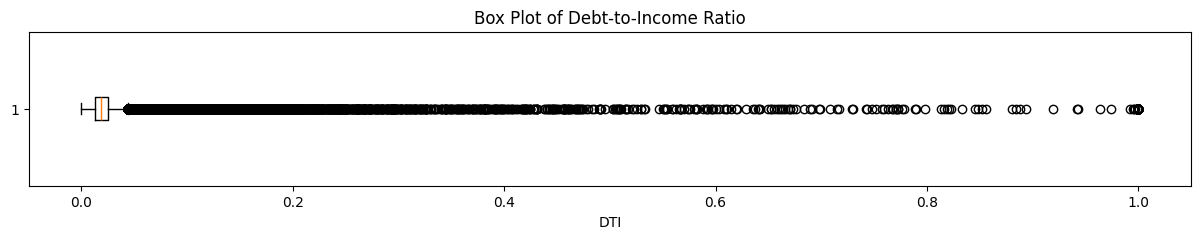

In [ ]:
# prompt: box plot for dti

plt.figure(figsize=(15, 2))
plt.boxplot(data['dti'].dropna(), vert=False)  # Use dropna() to handle potential NaN values
plt.xlabel('DTI')
plt.title('Box Plot of Debt-to-Income Ratio')
plt.show()

In [ ]:
print(data['dti'].min())

-1.0


**Observations:**

* The negative value that exists caused issues with performing log transformation (wasn't obvious before I tried it).
  * The "RuntimeWarning" that shows in the following post-logging boxplot brings up a question about there being a negative *'dti'* value.

* In fact, focusing just on the values for *'dti'* (which is a percentage of a person's monthly debt vs their monthly income), it seems strange that thousands of entries have values far beyond 100% (letalone a normal upper limit of around 40-50%).


In [ ]:
# Make a copy of 'data' just for logging so we can revert back

data_log = data.copy()

In [ ]:
data_log.head()

,grade,hardship_flag,addr_state,annual_inc,dti,funded_amnt_inv
0,C,N,PA,0.005000,0.00691,0.0900
1,C,N,SD,0.005910,0.01706,0.6175
2,B,N,IL,0.005728,0.01178,0.5000
3,C,N,NJ,0.010001,0.01806,0.8750
4,F,N,PA,0.009495,0.02637,0.2600


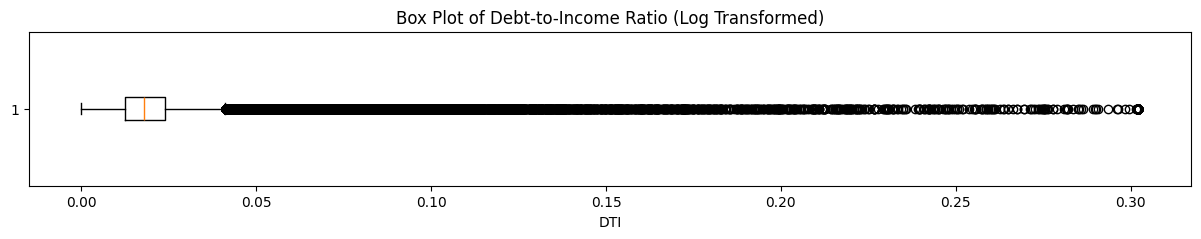

Number of outliers in dti after log transformation: 6222


In [ ]:
# prompt: log transformation on dti

# Log transformation on 'dti'
data_log['dti'] = np.log1p(data_log['dti'] + 1e-10) # 1e-10 is an arbitrary small constant value

# Plot the boxplot of 'dti' after the log transformation
plt.figure(figsize=(15, 2))
plt.boxplot(data_log['dti'].dropna(), vert=False)
plt.xlabel('DTI')
plt.title('Box Plot of Debt-to-Income Ratio (Log Transformed)')
plt.show()

# Recalculate and print outliers after log transformation
Q1 = data_log['dti'].quantile(0.25)
Q3 = data_log['dti'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
outliers_count = len(data_log[(data_log['dti'] < lower_bound) | (data_log['dti'] > upper_bound)])
print("Number of outliers in", bold_text('dti'), "after log transformation:", outliers_count)

**Observations:**

* The shape is certainly far more **normal** now.
* But now there are even **more outliers** after logging (from about 7k -> 28k).
* The **RuntimeWarning** is due to the **negative** value trying to be logged (which is **not possible** since a positive base value cannot result in a negative when raised to an exponent).

##### Looking at *'funded_amnt_inv'*

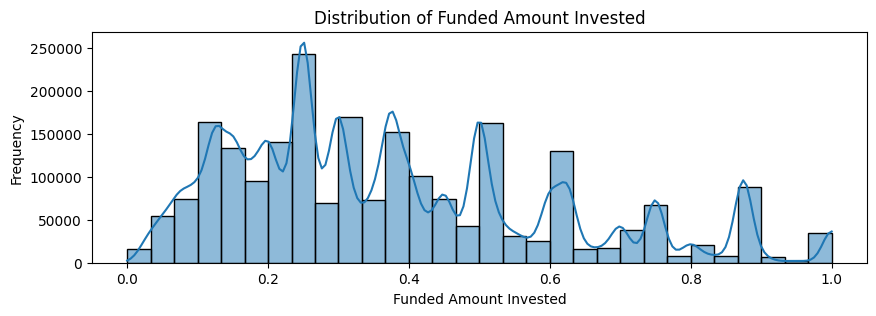

In [ ]:
# prompt: histogram with kde for funded_amnt_inv

import seaborn as sns

plt.figure(figsize=(10, 3))
sns.histplot(data['funded_amnt_inv'], kde=True, bins=30)      # I set the amount of bins to 30 to avoid the default having far more bins that were far skinnier
plt.title('Distribution of Funded Amount Invested')
plt.xlabel('Funded Amount Invested')
plt.ylabel('Frequency')
plt.show()

##### **MinMaxScaler** to set everything to a range of 0-1

In [ ]:
# prompt: scale income

# The distribution shape with MinMaxScaler will not change, just the values down to 0-1

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
data[['annual_inc', 'dti', 'funded_amnt_inv']] = scaler.fit_transform(data[['annual_inc', 'dti', 'funded_amnt_inv']])

**Observations:**

* If you were to rerun the any of the above graphs (dotplot, boxplot, histogram w/ KDE) after scaling, it would look identical, except the x-axis is now scaled to 0-1.

### **5a. Effects of Scaling**

* Some bivariate analysis to plot feature interaction

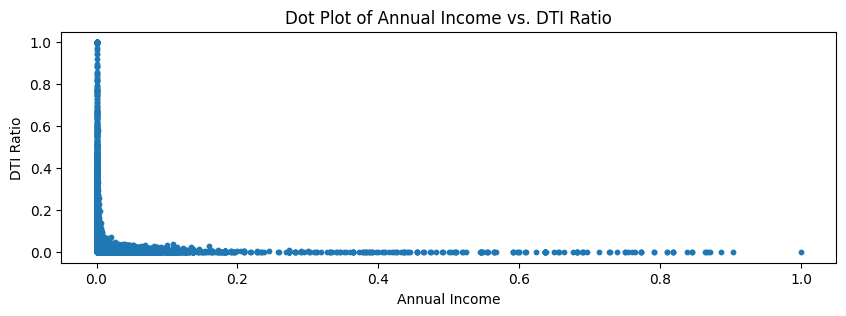

In [ ]:
# prompt: dotplot for income and dti

plt.figure(figsize=(10, 3))
plt.scatter(data['annual_inc'], data['dti'], s=10)  # Create the dot plot
plt.xlabel('Annual Income')
plt.ylabel('DTI Ratio')
plt.title('Dot Plot of Annual Income vs. DTI Ratio')
plt.show()

**Observations:**

* As would be expected, the *average debt* level thins out as a person's *income* increases.

* But because of the higher incomes, the majority of these values is not very small (less than even 0.1).  This might make further analysis a bit challenging.

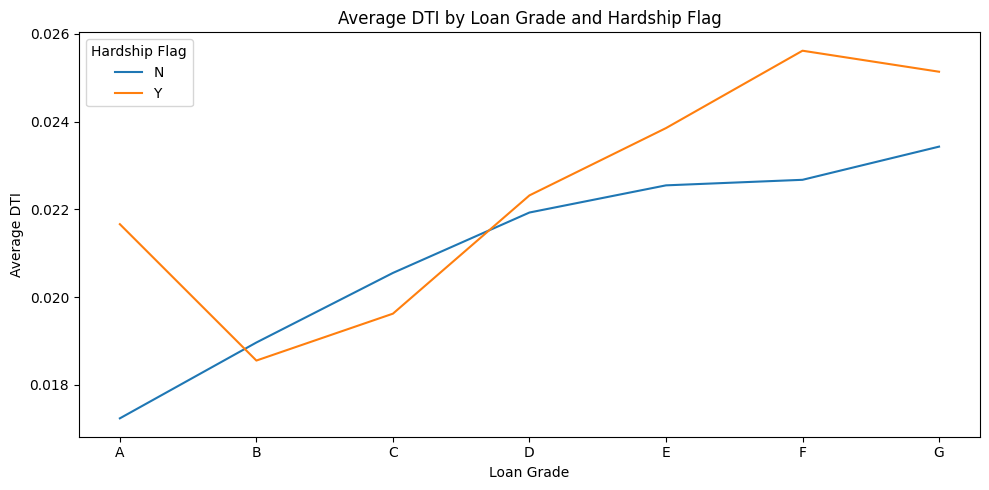

In [ ]:
# prompt: stacked bar graph with loan grade on x-axis, hardship as bars, and dti on y-axis

# Group the data by loan grade and hardship flag
grouped_data = data_pre_encode.groupby(['grade', 'hardship_flag'])['dti'].mean().unstack()

# Create the stacked bar graph
grouped_data.plot(kind='line', figsize=(10, 5))

plt.title('Average DTI by Loan Grade and Hardship Flag')
plt.xlabel('Loan Grade')
plt.ylabel('Average DTI')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Hardship Flag')
plt.tight_layout()
plt.show()

**Observations:**

* Interesting that there is a generally higher a *debt* ratio for people flagged for *hardship* in the *loan grade* of **A** and drops to **B** before rising again.
  * It does make sense that the *debt* ratio increases overall as the *loan grade* diminshes past **B**.

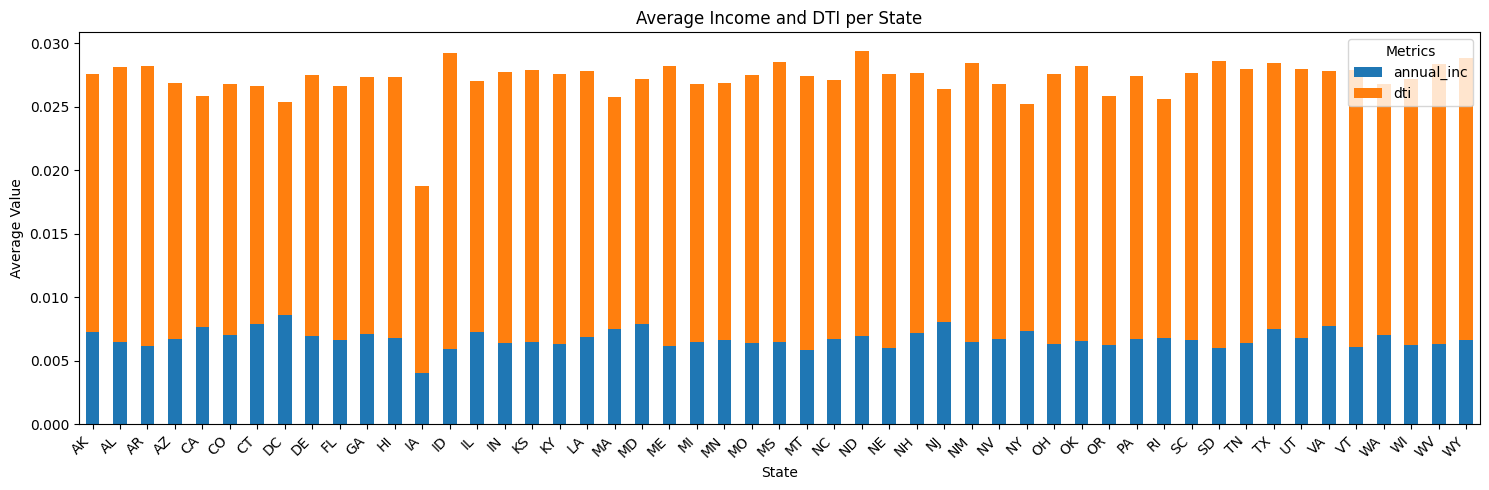

In [ ]:
# prompt: income and dti per state stacked bar graph

import matplotlib.pyplot as plt

# Group data by state and calculate the mean income and DTI
state_stats = data_pre_encode.groupby('addr_state').agg({'annual_inc': 'mean', 'dti': 'mean'})

# Create the stacked bar chart
state_stats.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Average Income and DTI per State')
plt.xlabel('State')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

**Observations:**

* The *'dti'* values are so much greater than *income* after scaling, as previously noted.  This provides a strong visual cue that the data for *'dti'* might need to be addressed.
  * It also conncects to how so much of the *income* data being concentrated in a small range but then a large amount of much higher values that skew the distribution.

* The states are generally pretty similar for both metrics.
  * *Except* **Iowa (IA)** is significantly smaller in both *income* & *debt*.  This could imply that while Iowans may earn less on average, they are alsoe more responsible with their money and don't go into as much debt as the other states.

* **Idaho (ID)** seems to have the highest *debt* ratio (perhaps **North Dakota (ND)**, as well).

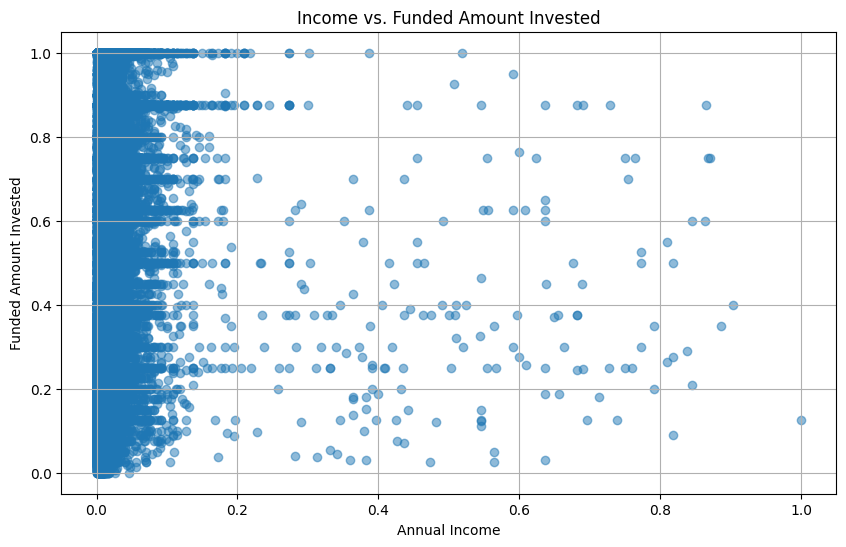

In [ ]:
# prompt: scatter income vs funded

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['annual_inc'], data['funded_amnt_inv'], alpha=0.5)  # Use alpha for better visualization if many points overlap
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount Invested')
plt.title('Income vs. Funded Amount Invested')
plt.grid(True)
plt.show()

**Observations:**

* There are several flat lines for the *amount funded* (ex: 0.9 & 1.0), which suggests to me that there may be set levels for a loan to be funded by investments.

* As *income* increases, there is not as obvious a connection to *amount funded* as I would have expected.  I thought there might be a more clearly inverse relation (i.e. as income increases, you might need less of your loan funded by investment).